In [22]:
# install package
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [23]:
path = "test.png"
origin_img = cv2.imread(path)

In [24]:
# define court size
width = 1800
height = 900

In [25]:
cp_origin = []

In [26]:
def click(event, x, y, flags, params):
    global cp_origin
    if event == cv2.EVENT_LBUTTONDOWN:
        cp_origin.append([x,y])
        print(x, y)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cp_origin = []
        print("clear")

In [27]:
# Click on corners of the court in the order of TL, BL, BR, TR.
#  can be 
cv2.imshow("window1", origin_img)
cv2.setMouseCallback("window1", click)
cv2.waitKey(0)
cv2.destroyAllWindows()

379 342
20 1893
3987 1762
3514 273


In [28]:
# TL BL BR TR
cp_origin = np.float32(cp_origin)
cp_trans = np.float32([[0,0], [0, height], [width, height], [width, 0]])
print(cp_origin)

[[ 379.  342.]
 [  20. 1893.]
 [3987. 1762.]
 [3514.  273.]]


In [29]:
M = cv2.getPerspectiveTransform(cp_origin, cp_trans)
trans_img = cv2.warpPerspective(origin_img, M, (width, height))
print(M)

[[ 5.98865732e-01  1.38615601e-01 -2.74376648e+02]
 [ 1.73029591e-02  7.86156183e-01 -2.75423236e+02]
 [-3.54950898e-06  1.83823660e-04  1.00000000e+00]]


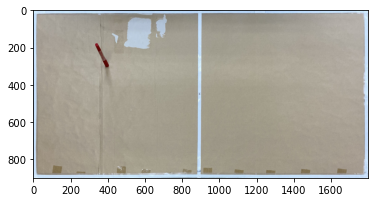

In [30]:
# cv2 : BGR
# matplotlib : RGB
plot_img = cv2.cvtColor(trans_img, cv2.COLOR_BGR2RGB)
plt.imshow(plot_img)

In [31]:
cv2.imwrite("trans_img.png", trans_img)

True